## LABORATORIO 3 

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib ipympl

from PIL import Image

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star,
                                binary_erosion, binary_dilation, binary_opening, binary_closing,
                               remove_small_holes, label, convex_hull_image, skeletonize, thin, reconstruction,
                               opening, closing, dilation, erosion)


from skimage.util import invert
from skimage import data, util, exposure, color



**Apartado 1:**

formato: TIFF
(ancho, alto) = (600, 600)
modo:  L


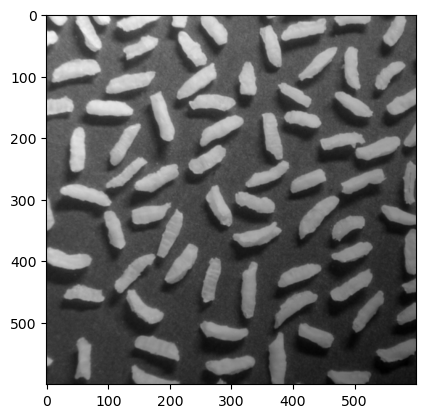

In [53]:
img = Image.open('images/riceBGgradient.tif')
print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)
img = np.array(img) #pasamos la imagen a numpy para poder operar con ella 
plt.figure()
plt.imshow(img, cmap='gray')

Hasta aquí simplemente hemos mostrado la imagen.

**Apartado 2:**

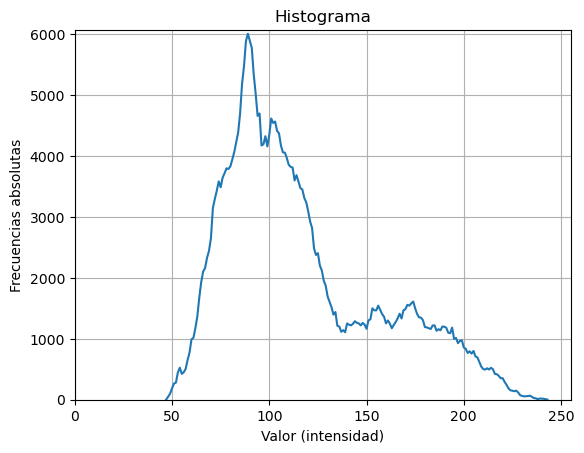

In [54]:
img_hist, bins = exposure.histogram(img, normalize=False)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias absolutas')
plt.grid()

Viendo el histograma nos podemos hacer una idea de como están repartidos las intensidades de blanco y negro en la imagen. 

Text(0.5, 1.0, 'Imagen transformada')

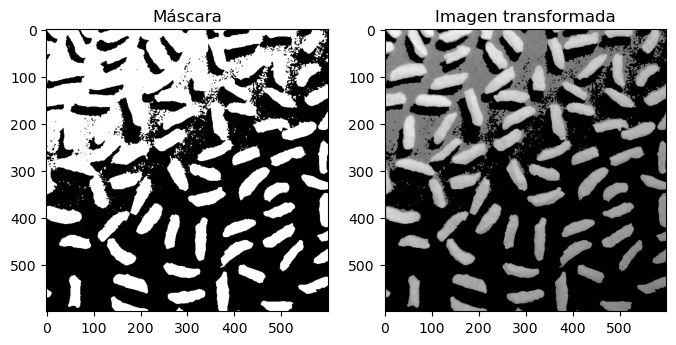

In [55]:
th_0, th_1 = 110, 255

mask = np.logical_and(img > th_0, img < th_1)

img_seg = img*mask

plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Máscara')

plt.subplot(122)
plt.imshow(img_seg, cmap='gray')
plt.title('Imagen transformada')

Como podemos ver, no llegamos a conseguir bien separar los granos de arroz. Esto es debido a que tenemos una falta de uniformidad en el fondo y, por lo tanto, la máscara que estamos usando nos sirve solo para algunas zonas de la imagen.

**Apartado 3**

Para poder separar los granos del fondo, debemos igualar toda la iluminación de la imagen. 

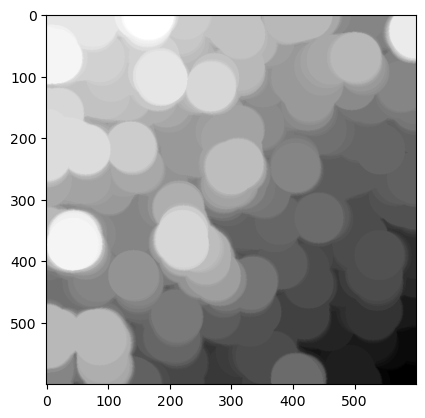

In [56]:
#Estimamos la variación de iluminación del fondo con una apertura
fondo = opening(img, disk(40))
plt.imshow(fondo, cmap='gray')

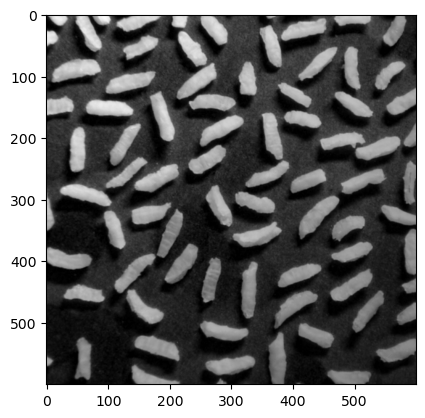

In [57]:
img_fondo = img-fondo
plt.imshow(img_fondo, cmap='gray')

Aquí podemos ver como tenemos la imagen con un mismo fondo, es decir, de un color homogéneo. Esto lo hemos realizado mendiante una "Transformación Top-Hat".
Ahora, debemos separar los granos de arroz del fondo.

Ahora, vamos a mostrar el histograma para ver las diferencias con respecto a la imagen inicial.

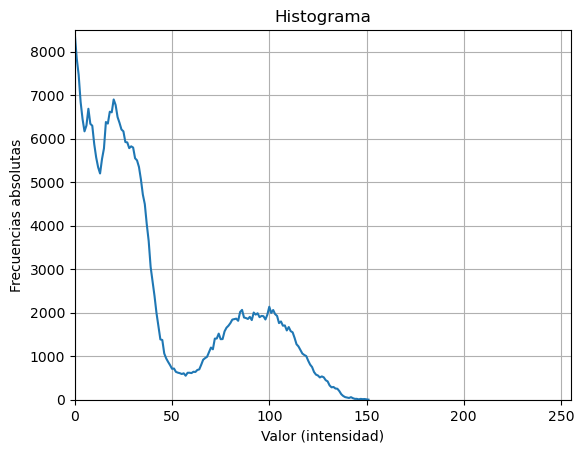

In [69]:
img_hist2, bins = exposure.histogram(img_fondo, normalize=False)
plt.plot(bins, img_hist2)
plt.axis([0,255, 0, 1.01*img_hist2.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias absolutas')
plt.grid()

Como era de esperar el histograma es muy diferente, ya que nuestras intensidades han variado bastante al homogeneizar el fondo. 

**Apartado 4:**

Para comenzar debemos importar la librería que pertenece a la función que queremos usar:

In [60]:
from skimage.filters import threshold_otsu

Ahora, usando la función "threshold_otsu" e introduciendo por parámetros lo que necesita podemos obtener el umbral.

In [65]:
print("Umbral: ")
print(threshold_otsu(img_fondo))

Umbral: 
57


Vamos a volver a usar una máscara (como hemos hecho antes) para poder separar los granos de arroz del fondo. La gran diferencia es que ya sabemso el valor umbral que tenemos que tomar y, por lo tanto, será muy fácil conseguir el resultado que queremos.

Text(0.5, 1.0, 'Imagen transformada')

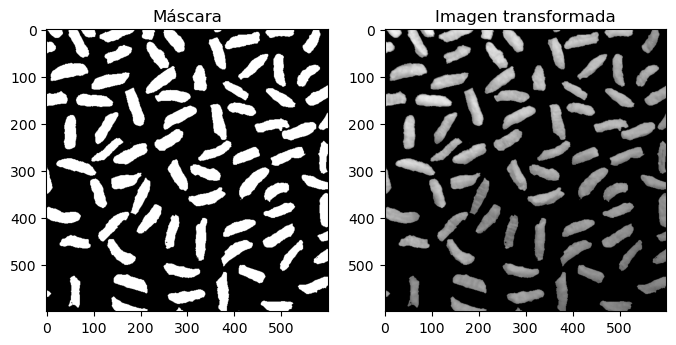

In [67]:
th_0, th_1 = 57, 255

mask = np.logical_and(img_fondo > th_0, img_fondo < th_1)

img_seg2 = img_fondo*mask

plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Máscara')

plt.subplot(122)
plt.imshow(img_seg2, cmap='gray')
plt.title('Imagen transformada')

Como podemos comprobar, ahora hemos separado perfectamente los granos de de arroz de la imagen. Podemos concluir que esta función de skimage es muy potente y podemos conseguir unos fantásticos resultados. 